#### Nama : Muhammad Ilham Febriana
#### NIM : 2602656022
#### Final Exam Machine Learning

# Explanory Data Analysis

Project machine learning ini dilakukan untuk memenuhi Final Exam mata kuliah Machine Learning pada nomor 1. Dataset yang digunakan adalah data record pasien yang terkena kanker mata pada suatu rumah sakit, data ini diambil platform Kaggle. Pada tahap EDA ini dliakukan visualisasi fitur-fitur yang ada pada dataset yang kemudian permbersihannya agar lebih optimal saat digunakan pada modeling. EDA sangat penting dilakukan karena beberapa model yang akan digunakan sangat sensitive terhadap missing value dan oulier, maka dari itu akan ada syntax untuk mendeteksi mssing value dan oulier dan penanganannya juga.

Ukuran dataset: (5000, 16)

5 data teratas:
  Patient_ID  Age Gender     Cancer_Type Laterality Date_of_Diagnosis  \
0   PID00001   58      F  Retinoblastoma       Left        2019-01-25   
1   PID00002   15  Other  Retinoblastoma      Right        2021-10-21   
2   PID00003   64      M  Retinoblastoma  Bilateral        2021-03-12   
3   PID00004   33      M        Melanoma      Right        2021-05-10   
4   PID00005    8  Other        Lymphoma       Left        2019-11-24   

  Stage_at_Diagnosis Treatment_Type  Surgery_Status  Radiation_Therapy  \
0           Stage IV      Radiation           False                 15   
1          Stage III   Chemotherapy            True                 69   
2           Stage IV        Surgery           False                 47   
3           Stage II      Radiation            True                 36   
4            Stage I   Chemotherapy           False                 14   

   Chemotherapy Outcome_Status  Survival_Time_Months Genetic_Markers  \


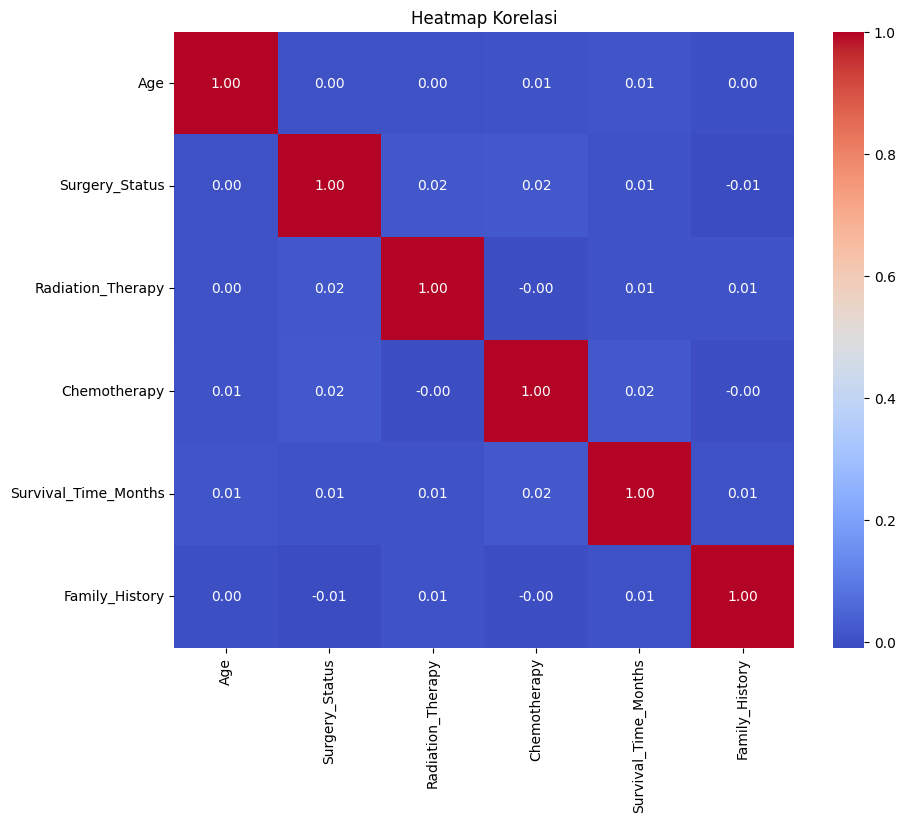

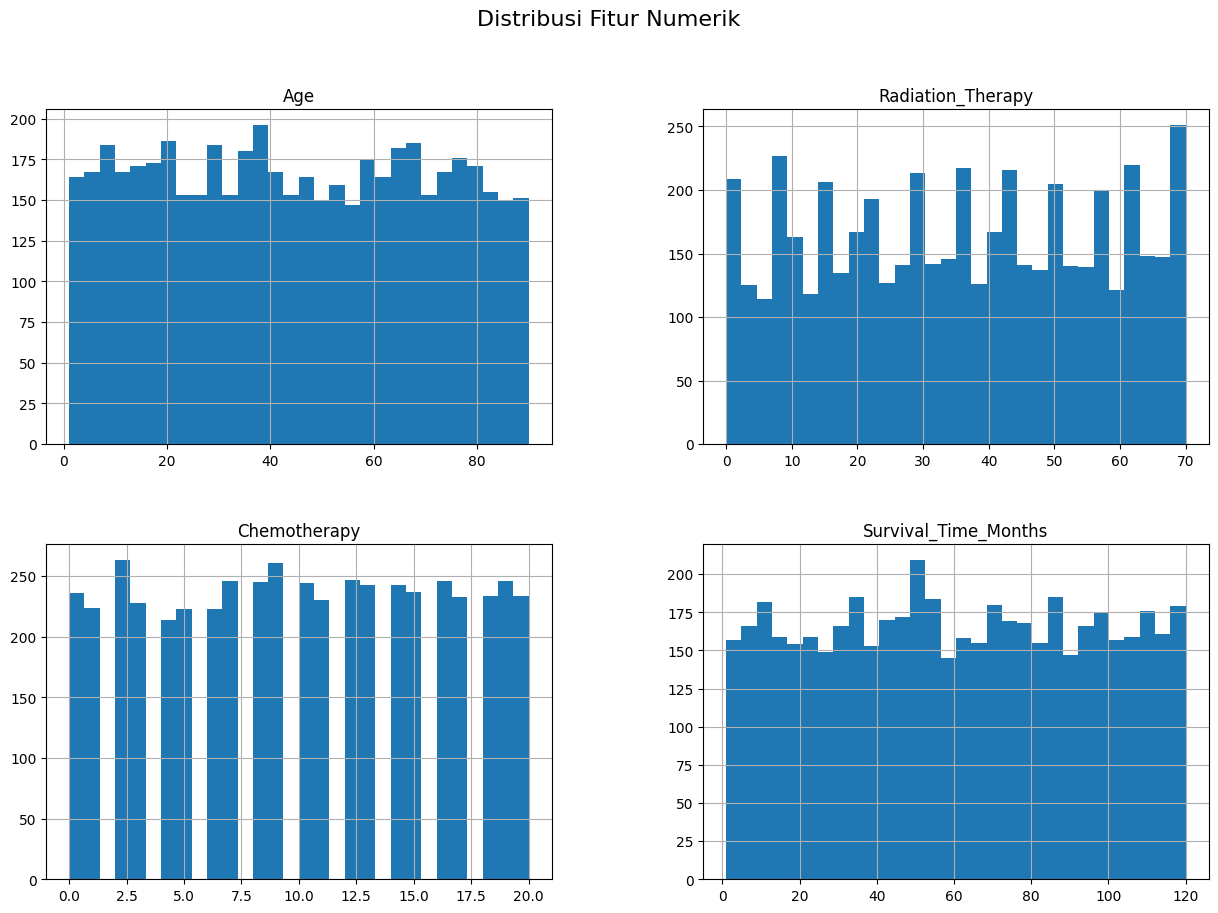

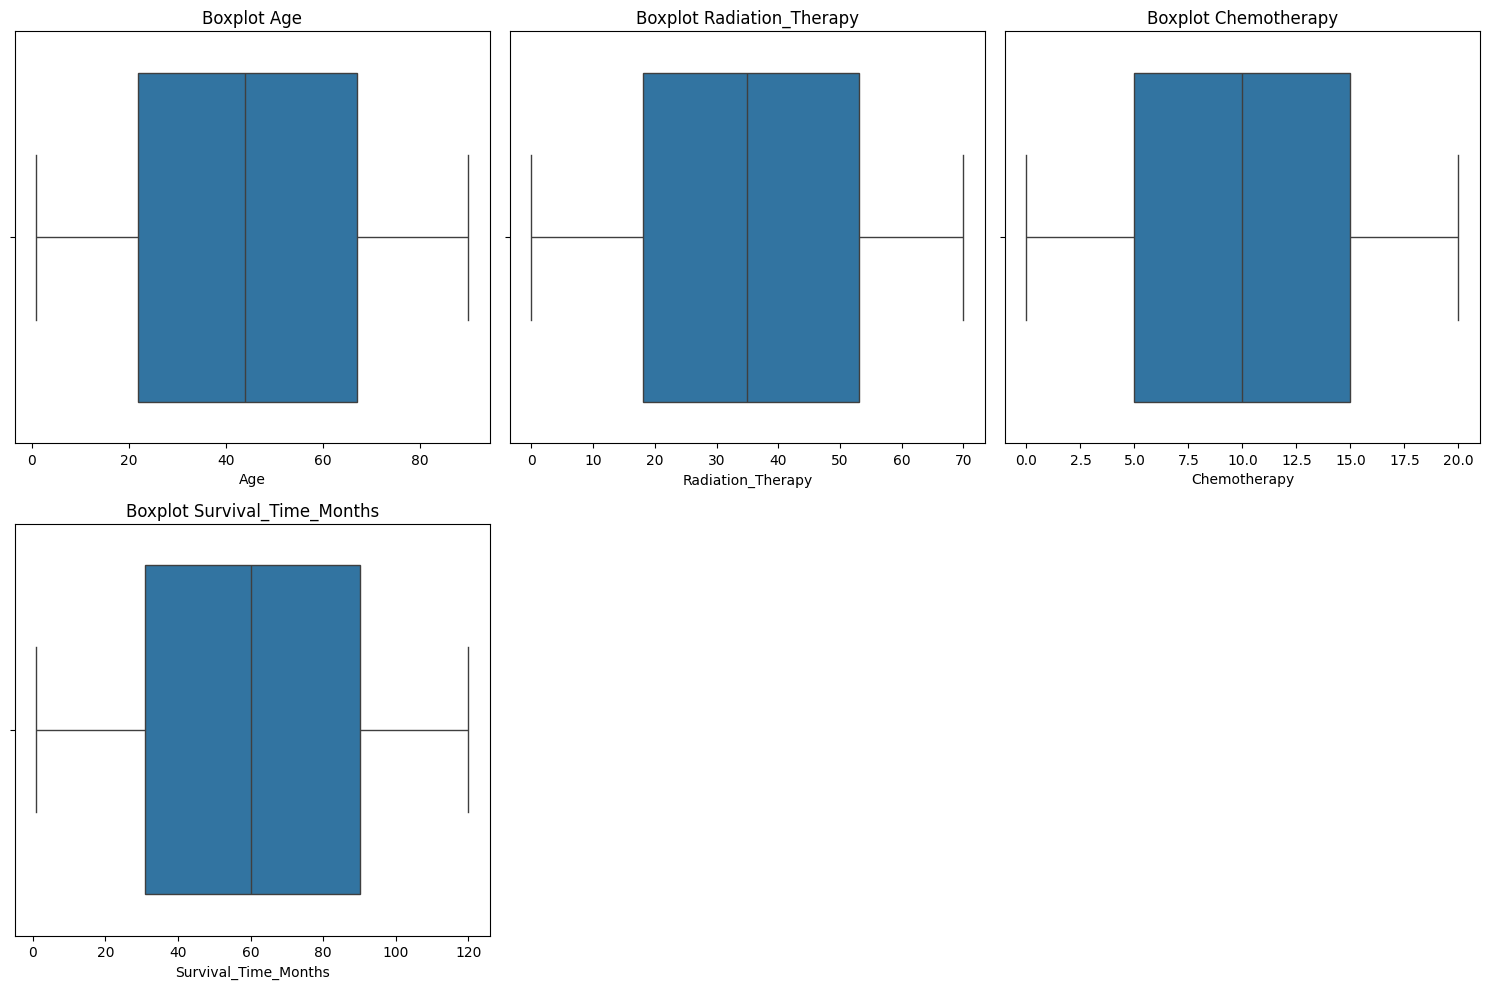

Dari analissi boxplot, kita mengidentifikasi tidak adanya outlier pada fitur numerik yang ada.


In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('eye_cancer_patients.csv')

# Lihat struktur dasar dataframe
print("Ukuran dataset:", df.shape)
print("\n5 data teratas:")
print(df.head())


# Cek distribusi target (jika ada kolom target)
target_col = 'target'  # ganti dengan nama kolom targetmu
if target_col in df.columns:
    print("\nDistribusi target:")
    print(df[target_col].value_counts())
    sns.countplot(x=target_col, data=df)
    plt.title('Distribusi Target')
    plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

# Distribusi fitur numerik (histogram)
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

# Boxplot untuk deteksi outlier
numerics = df.select_dtypes(include=['int64', 'float64']).columns  
# Menentukan jumlah kolom dan baris untuk grid  
num_cols = 3  # Menentukan jumlah kolom  
num_rows = (len(numerics) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang diperlukan  

# Mempersiapkan figure dan axes  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  

# Mengubah axes menjadi array satu dimensi untuk kemudahan iterasi  
axes = axes.flatten()  

# Membuat boxplot untuk setiap kolom numerik  
for idx, col in enumerate(numerics):  
    sns.boxplot(data=df, x=col, ax=axes[idx])  
    axes[idx].set_title(f'Boxplot {col}')  

# Menyembunyikan axes yang tidak terpakai (jika ada)  
for j in range(idx + 1, num_rows * num_cols):  
    fig.delaxes(axes[j])  

# Mengatur layout untuk memperbaiki tampilan  
plt.tight_layout()  
plt.show()  
print("Dari analissi boxplot, kita mengidentifikasi tidak adanya outlier pada fitur numerik yang ada.")

In [ ]:
#  Info kolom dan tipe data
print("\nInformasi kolom:")
print(df.info())

# Cek missing values
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())
# No missing value from the sample data

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country             

In [ ]:
# Menangani missing values dengan mengisi dengan nilai yang sesuai

print(df['Genetic_Markers'].unique())
df['Genetic_Markers'] = df['Genetic_Markers'].fillna('Unknown')
print(df['Genetic_Markers'].unique())
print(df.isnull().sum())



[nan 'BRAF Mutation']
['Unknown' 'BRAF Mutation']
Patient_ID              0
Age                     0
Gender                  0
Cancer_Type             0
Laterality              0
Date_of_Diagnosis       0
Stage_at_Diagnosis      0
Treatment_Type          0
Surgery_Status          0
Radiation_Therapy       0
Chemotherapy            0
Outcome_Status          0
Survival_Time_Months    0
Genetic_Markers         0
Family_History          0
Country                 0
dtype: int64


In [208]:
print(df.nunique())  # jumlah nilai unik tiap kolom
print(df['Outcome_Status'].unique())

Patient_ID              5000
Age                       90
Gender                     3
Cancer_Type                3
Laterality                 3
Date_of_Diagnosis       1957
Stage_at_Diagnosis         4
Treatment_Type             3
Surgery_Status             2
Radiation_Therapy         71
Chemotherapy              21
Outcome_Status             3
Survival_Time_Months     120
Genetic_Markers            2
Family_History             2
Country                   10
dtype: int64
['Deceased' 'In Remission' 'Active']



Distribusi target:
Outcome_Status
Deceased        1710
In Remission    1675
Active          1615
Name: count, dtype: int64


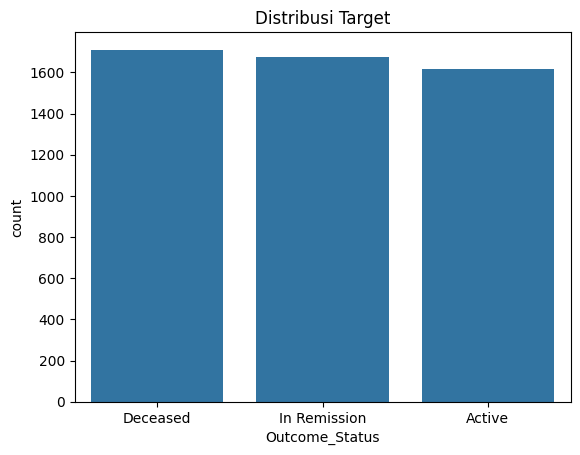

In [ ]:
# Visualisasi distribusi target

target_col = 'Outcome_Status' 
if target_col in df.columns:
    print("\nDistribusi target:")
    print(df[target_col].value_counts())
    sns.countplot(x=target_col, data=df)
    plt.title('Distribusi Target')
    plt.show()



# Data Pre Processing
Setelah melakukan EDA artinya dataset sudah bersih. Selanjutnya penyesuaian fitur agar bisa diproses oleh model machine learning, ada one hot encoding seperti yang dilakukan pada label Y yang bertujuan untuk mengubah tipe data fitur dari nominal atau polynominal menjadi numerik 0,1,2,3 sesuai jumlah class nya. Setelah itu ada dummy encoding yang bertujuan untuk mengubah fitur kategorial menjadi numerik atau format yang daat diproses. Terakhir ada yang namanya normalisasi, normalisasi bertujuan untuk meratakan data numerik dalam rentang yang seragam atau menyamakan skala data agar setiap fitur numerik memiliki kesetaraan. Model KNN dan SVM sangat memerlukan normalisasi data agar modeling lebih optimal.


Label Y setelah label encoder:
0    1
1    2
2    2
3    0
4    2
5    0
6    1
7    2
8    2
9    2
Name: Outcome_Status, dtype: int32

Distribusi target:
Outcome_Status
1    1710
2    1675
0    1615
Name: count, dtype: int64


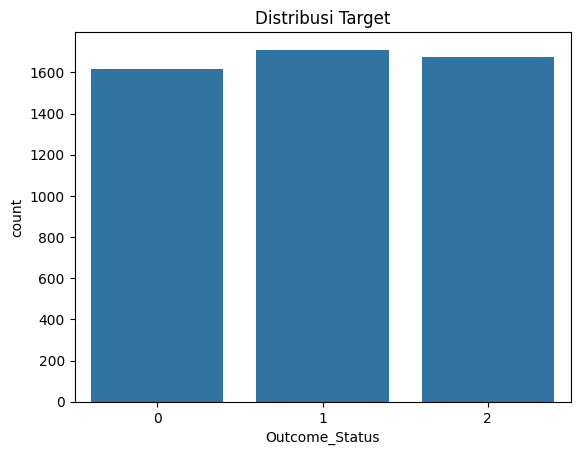

In [ ]:
# Label Y adalah Outcome_Status

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Label encoding untuk kolom 'Outcome_Status'
le = LabelEncoder()
scaler = MinMaxScaler()
df['Outcome_Status'] = le.fit_transform(df['Outcome_Status'])

# Inisiasi label Y
Y = df['Outcome_Status']


print("\nLabel Y setelah label encoder:")
print(Y.head(10))

target_col = 'Outcome_Status'  
if target_col in df.columns:
    print("\nDistribusi target:")
    print(df[target_col].value_counts())
    sns.countplot(x=target_col, data=df)
    plt.title('Distribusi Target')
    plt.show()

In [ ]:
# Inisiasi fitur X
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Outcome_Status', 'Patient_ID', 'Date_of_Diagnosis'])
print("\nFitur X:")
print(X.head(10))





Fitur X:
   Age Gender     Cancer_Type Laterality Stage_at_Diagnosis Treatment_Type  \
0   58      F  Retinoblastoma       Left           Stage IV      Radiation   
1   15  Other  Retinoblastoma      Right          Stage III   Chemotherapy   
2   64      M  Retinoblastoma  Bilateral           Stage IV        Surgery   
3   33      M        Melanoma      Right           Stage II      Radiation   
4    8  Other        Lymphoma       Left            Stage I   Chemotherapy   
5   41  Other  Retinoblastoma  Bilateral          Stage III        Surgery   
6   67  Other        Lymphoma      Right            Stage I        Surgery   
7   26  Other  Retinoblastoma  Bilateral          Stage III      Radiation   
8    5  Other  Retinoblastoma      Right            Stage I   Chemotherapy   
9   23      M        Lymphoma      Right           Stage IV        Surgery   

   Surgery_Status  Radiation_Therapy  Chemotherapy  Survival_Time_Months  \
0           False                 15             3     

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Kolom yang ingin di-label encode
encode_cols = ['Stage_at_Diagnosis', 'Surgery_Status', 'Family_History', 'Laterality', 'Cancer_Type', 'Gender', 'Treatment_Type', 'Country', 'Genetic_Markers']

# Terapkan label encoding
# Generate dummy variables for categorical columns
X_dummies = pd.get_dummies(X[encode_cols])

# Inisiasi fitur X dengan menghapus kolom yang sudah di-encode
X = pd.concat([X.drop(columns=encode_cols), X_dummies], axis=1)

print("\nFitur X setelah label encoding:")
print(X.head(10))



Fitur X setelah label encoding:
   Age  Radiation_Therapy  Chemotherapy  Survival_Time_Months  Surgery_Status  \
0   58                 15             3                    85           False   
1   15                 69             6                    10            True   
2   64                 47             6                     3           False   
3   33                 36             6                    40            True   
4    8                 14            14                    26           False   
5   41                 11            17                    15            True   
6   67                 50             2                    93           False   
7   26                 46            13                     9           False   
8    5                 48             7                    12           False   
9   23                 42             2                   116           False   

   Family_History  Stage_at_Diagnosis_Stage I  Stage_at_Diagnosis_Stage II 

In [214]:

# Scaler untuk normalisasi fitur kontinu
scaler = MinMaxScaler()
kolom_normalisasi = ['Age', 'Survival_Time_Months', 'Radiation_Therapy', 'Chemotherapy']
X[kolom_normalisasi] = scaler.fit_transform(X[kolom_normalisasi])
print("\nFitur X setelah label encoding dan normalisasi:")
print(X)


Fitur X setelah label encoding dan normalisasi:
           Age  Radiation_Therapy  Chemotherapy  Survival_Time_Months  \
0     0.640449           0.214286          0.15              0.705882   
1     0.157303           0.985714          0.30              0.075630   
2     0.707865           0.671429          0.30              0.016807   
3     0.359551           0.514286          0.30              0.327731   
4     0.078652           0.200000          0.70              0.210084   
...        ...                ...           ...                   ...   
4995  0.696629           0.542857          0.65              0.277311   
4996  0.471910           1.000000          0.45              0.218487   
4997  0.977528           0.685714          1.00              0.588235   
4998  0.370787           0.871429          0.05              0.243697   
4999  0.471910           0.314286          0.35              0.907563   

      Surgery_Status  Family_History  Stage_at_Diagnosis_Stage I  \
0     

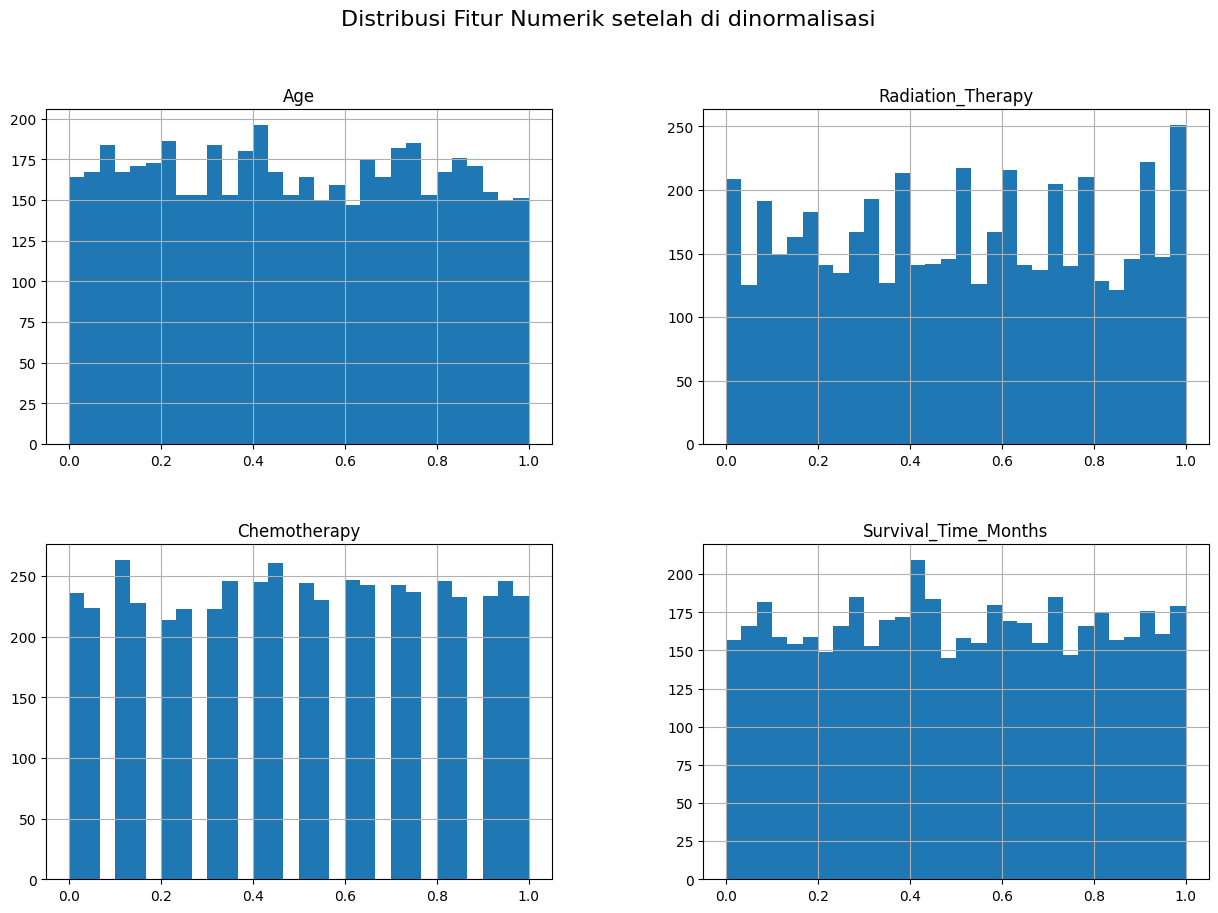

In [230]:
# 7. Distribusi fitur numerik (histogram)
X.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik setelah di dinormalisasi', fontsize=16)
plt.show()


# Data Modeling dan Model Evaluasi model SVM, KNN dan ANN
Di tahap ini setiap model di tunning menggunkan grid search untuk mendapatkan parameter terbaiknya agar hasil klasifikasi lebih maksimal. Setelah itu tehknik modeling nya menggunakan Cross Validation K-Fold agar model tidak over fitting atau under fitting. Tekhnik modeling tersebut hampir sama dengan tehknik Hold out validation yang dimana mempratisi dataset menjadi 3 subset data sepertti data training, data testing, dan data validation, kemudian melakukan cross validation per fold pada prosesnya, tetapi Cross Validation jauh lebih advance daripada tehknik Hold out yang hanya membagi dataset menjadi training dan testing saja. 

In [216]:
# Hyperparameter tuning untuk model SVM
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'sigmoid'],
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, Y)

print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Model SVM menggunakan Cross Validation dari parameter terbaik

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ambil parameter terbaik
best_params = grid_search.best_params_

# Implementasikan parameter terbaik pada model dan lakukan Cross-Validation
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Mendefinisikan StratifiedKFold dengan 5 fold untuk menjaga proporsi kelas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation
cv_scores_pred = cross_val_predict(svm_model, X, Y, cv=cv)

# Menampilkan hasil cross-validation dan prediksi nya

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y, cv_scores_pred))

# Menampilkan classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(Y, cv_scores_pred))


Confusion Matrix:
[[603 488 524]
 [622 566 522]
 [623 538 514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1615
           1       0.36      0.33      0.34      1710
           2       0.33      0.31      0.32      1675

    accuracy                           0.34      5000
   macro avg       0.34      0.34      0.34      5000
weighted avg       0.34      0.34      0.34      5000



In [218]:
# Menggunakan teknik train-test split untuk membagi data menjadi data latih dan data uji (Hold Out Validation)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Melatih model pada seluruh data training
svm_model.fit(X_train, Y_train)

# Evaluasi pada data testing
y_pred_test = svm_model.predict(X_test)  # Prediksi pada data testing

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Testing):")
print(confusion_matrix(Y_test, y_pred_test))

# Menampilkan classification report untuk data testing
print("\nClassification Report (Testing):")
print(classification_report(Y_test, y_pred_test))

Confusion Matrix (Testing):
[[123 118  99]
 [150 105  99]
 [128  88  90]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       340
           1       0.34      0.30      0.32       354
           2       0.31      0.29      0.30       306

    accuracy                           0.32      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.32      0.32      0.32      1000



Kesimpulan modeling SVM : pada tehknik permodelan antara cross validation dan hold out validation menghasilkan performance sedikit berbeda, dimana akurasi Cross validation di angka 34, sedangkan Holdout validation berada di angka 32. 

### Selanjutnya model KNN

In [ ]:
# parameter grid untuk KNN
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Bobot suara tetangga
    'metric': ['euclidean', 'manhattan', 'camberra'],  # Ukuran jarak
}

# Inisiasi parameter terbaik untuk KNN
grid_search_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5, n_jobs=-1, verbose=2)
grid_search_KNN.fit(X, Y)

print(f"Best parameters found: {grid_search_KNN.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


C:\Users\Ilham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ilham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ilham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

In [ ]:
# Cross Validation untuk Model KNN

# Ambil parameter terbaik
best_params = grid_search_KNN.best_params_

#  Implementasikan parameter terbaik pada model dan lakukan Cross-Validation
Knn_model_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])

# Inisialisasi model SVM dan KNN
# svm_model = SVC(kernel='rbf', random_state=42)


# Mendefinisikan StratifiedKFold dengan 5 fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation
cvKNN_scores_pred = cross_val_predict(Knn_model_best, X, Y, cv=cv)


# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y, cvKNN_scores_pred))

# Menampilkan classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(Y, cvKNN_scores_pred))

Confusion Matrix:
[[553 517 545]
 [510 621 579]
 [529 621 525]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.34      0.34      1615
           1       0.35      0.36      0.36      1710
           2       0.32      0.31      0.32      1675

    accuracy                           0.34      5000
   macro avg       0.34      0.34      0.34      5000
weighted avg       0.34      0.34      0.34      5000



In [ ]:
# Hold Out Validation untuk KNN

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, classification_report  

# Melatih model pada seluruh data training
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, Y_train)  

# Evaluasi pada data testing  
y_pred_test = knn_model.predict(X_test)  # Prediksi pada data testing  

# Menampilkan confusion matrix untuk data testing  
print("Confusion Matrix (Testing):")  
print(confusion_matrix(Y_test, y_pred_test))  

# Menampilkan classification report untuk data testing  
print("\nClassification Report (Testing):")  
print(classification_report(Y_test, y_pred_test))  

Confusion Matrix (Testing):
[[164 106  70]
 [154 120  80]
 [149  99  58]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.35      0.48      0.41       340
           1       0.37      0.34      0.35       354
           2       0.28      0.19      0.23       306

    accuracy                           0.34      1000
   macro avg       0.33      0.34      0.33      1000
weighted avg       0.34      0.34      0.33      1000



Kesimpulan model KNN : Hasil score yang didapat tidak terlalu signifikan tetapi distribusi confussion matrix nya pada Cross Validation lebih merata yang berarti model tidak mengalami overfitting, sehingga Cross Validation lebih baik untuk persebaran yang merata pada modeling.

In [ ]:
# Buiat hyperparameter tuning untuk model ANN (Artificial Neural Network)

# Ensure scikeras is installed
# %pip install scikeras tensorflow
from sklearn.neural_network import MLPClassifier

from scikeras.wrappers import KerasClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the hyperparameter search space for the ANN model
ann_params_accuracy = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Mendifikan fungsi untuk membuat model ANN
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# menginisisasi RandomizedSearchCV untuk ANN dengan fokus pada akurasi
ann_clf_accuracy = RandomizedSearchCV(
    estimator=MLPClassifier(max_iter=1000, random_state=42),
    param_distributions=ann_params_accuracy,
    n_iter=10,  # Jumlah iterasi untuk pencarian acak
    cv=cv,
    scoring='accuracy',  # Fokus pada akurasi
    n_jobs=-1,
    random_state=42
)

# Fit the model on the training data (after applying SMOTE)
ann_clf_accuracy.fit(X, Y)

# Get the best model after RandomizedSearchCV
ann_model_accuracy = ann_clf_accuracy.best_estimator_

# Print the best hyperparameters based on accuracy
print("Best ANN Params (Accuracy Focused):", ann_clf_accuracy.best_params_)

Best ANN Params (Accuracy Focused): {'learning_rate': 'adaptive', 'hidden_layer_sizes': (64,), 'alpha': 0.01, 'activation': 'relu'}


In [ ]:
# Mendeklarasikan parameter terbaik model ANN
best_params = ann_clf_accuracy.best_params_

# Implement the best parameters on the MLPClassifier and perform Cross-Validation

mlp_model_best = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate'],
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

# Mendefinisikan StratifiedKFold dengan 5 fold untuk menjaga proporsi kelas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# melakukan cross-validation pada model ANN
cv_ann_scores_pred = cross_val_predict(mlp_model_best, X, Y, cv=cv)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y, cv_ann_scores_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y, cv_ann_scores_pred))

Confusion Matrix:
[[503 524 588]
 [550 565 595]
 [519 554 602]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.31      0.32      1615
           1       0.34      0.33      0.34      1710
           2       0.34      0.36      0.35      1675

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



In [ ]:
# Modeling hold Out Validation untuk ANN

best_params = ann_clf_accuracy.best_params_  

# Menginisiasi model MLPClassifier dengan parameter terbaik
mlp_model_best = MLPClassifier(  
    hidden_layer_sizes=best_params['hidden_layer_sizes'],  
    activation=best_params['activation'],  
    alpha=best_params['alpha'],  
    learning_rate=best_params['learning_rate'],  
    max_iter=1000,  # Jumlah iterasi maksimum
    random_state=42  
)  

# Melatih model menggunakan seluruh data training
mlp_model_best.fit(X_train, Y_train)  

# Prediksi pada data testing  
y_pred_test = mlp_model_best.predict(X_test)  # Prediksi pada data testing  

# Menampilkan confusion matrix untuk data testing  
print("Confusion Matrix (Testing):")  
print(confusion_matrix(Y_test, y_pred_test))  

# Menampilkan classification report untuk data testing  
print("\nClassification Report (Testing):")  
print(classification_report(Y_test, y_pred_test)) 

Confusion Matrix (Testing):
[[103 100 137]
 [115 108 131]
 [ 96  95 115]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.33      0.30      0.31       340
           1       0.36      0.31      0.33       354
           2       0.30      0.38      0.33       306

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



Kesimpulan model ANN : Hasil score dari tekhnik modeling Cross Validation dan Hold Out Validation tidak terlalu sigifikan, tetapi distribusi confussion matrix nya pada Cross Validation lebih merata yang berarti model tidak mengalami overfitting, sehingga Cross Validation tetap lebih baik daripada Hold Out Validation.